<a href="https://colab.research.google.com/github/Kinbloom/Week-9-Independent-Project/blob/master/Titanic_Dataset_(Week_9_IP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 9 Independent Project - Titanic Dataset

##Understanding the Context and Problem Definition

In 1912 the Titanic sank after colliding with an iceberg resulting in the deaths of majority of its passengers (1502 out of 2224 passengers and crew) which translated a 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough life boats for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class since they were given priority on the life boats.

Knowing various features about every single passenger, can our model determine if these passengers named in the dataset survived or not?

##Instructions

**The Titanic Dataset**

- The test set doesn't have the label feature, therefore we will use the train set to create the train(80%) and test data(20%) i.e. spliiting further.
- Thereafter perform the K-Nearest Neighbor Classifier.
- Compute the accuracy (percentage of correct classification).
- Report the confusion matrix of the KNN Classifier.
- Repeat the steps twice, each time splitting the datasets differently i.e. 70-30, 60-40.Then note the outcomes of your modeling.
- Suggest and apply an optimization technique.
- Provide further recommendations to improve the classifier.

##Exploratory Data Analysis and Data Cleaning 

In [0]:
#Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


#Import the necessary sci-kit learn importation commands
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Miscellaneous imports
import warnings
warnings.filterwarnings('ignore')

**Load the titanic datasets. There is a train set and a test set.**

In [109]:
#Import the train dataset

train = pd.read_csv('Titanic (train).csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
#Import the test dataset

test = pd.read_csv('Titanic (test).csv')

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Dictionary**

**Survival ---**	Did the passenger survive?	(0 = No, 1 = Yes)

**Pclass ---**Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)

**Sex ---**Sex (male or female)

**Age ---**Age in years of the passenger.

**Sibsp ---**Number of siblings/spouses aboard the Titanic.	

**Parch ---**	Number of parents/children aboard the Titanic.

**Ticket ---**Ticket number.	

**Fare ---**Passenger fare.

**Cabin ---**Cabin number.

**Embarked ---**Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

**Understanding the titanic dataset**

The aim of the study is to actually predict chances of survival for a passenger on board the Titanic.

The Pclass column tells us if a passenger was in 1st class, 2nd or 3rd class. This is an indication of the economic status of a passenger. Passenger fare is also an indication of economic status.

To establish the size of a family one has to factor in the number of siblings and spouses aboard and the number of parents and children aboard.

Some of the unnecessary columns are : Ticket , PassengerId , Cabin .

The train set has the Survival column as the dependent feature (label) and the other columns are independent of each other.

The test dataset doesn't seem to have the Survival column therefore the instructions dictate that we make use of the train dataset and split it further to create another subset of the train and test sets to work with.

Let's rename the train set to titanic since this is the primary dataset we will be using.

In [0]:
#Rename the dataframe to titanic

titanic = train

In [112]:
#Load the dataset

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
#Let's start by dropping the unecessary columns

column_to_drop = ['PassengerId','Ticket','Cabin']

titanic.drop(column_to_drop, axis=1, inplace = True)

In [114]:
#Rearrange the columns making sure the label column (column to predict) is last

titanic = titanic[['Pclass','Name','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]

titanic.head(0)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived


In [115]:
#What are the data types of the various columns.

titanic.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

Which features are:

1. **Categorical ?**
- Survived
- Sex
- Embarked

2. **Ordinal?**
- Pclass.

3. **Numerical?**
- Age (Continuous)
- Fare (Continuous)
- SibSp (Discrete)
- Parch (Discrete)

In [0]:
#Convert the relevant data types to categorical

# Creating a list of the numerical columns in the dataset.
numeric = ['Age', 'Fare', 'SibSp', 'Parch']

categoricals = ['Survived','Pclass','Sex','Embarked']

objects = ['Name']

for x in titanic.columns:
   if x in numeric:
       titanic[x]=pd.to_numeric(titanic[x])
   elif x in categoricals:
        titanic[x]=titanic[x].astype('category')

In [117]:
#Check if features are assigned the relevant data types

titanic.dtypes

Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
Survived    category
dtype: object

In [118]:
#Check the info for the training dataset

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass      891 non-null category
Name        891 non-null object
Sex         891 non-null category
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null category
Survived    891 non-null category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 38.8+ KB


In [119]:
#Check the descriptive analysis of the dataset

titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


The descriptive analysis implies there may be null values in the dataset, so let's check for missing values.

In [120]:
 #Check for missing values

titanic.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

The Age column also has multiple missing values. What is the best way to deal with the missing values?

In [121]:
#Check for outliers in the Age dataset

Q1 = titanic.Age.quantile(0.25)
Q3 = titanic.Age.quantile(0.75)

IQR = Q3 - Q1

age_outliers = ((titanic.Age < Q1 - 1.5 * IQR) | (titanic.Age > Q3 + 1.5 * IQR))
age_outliers.value_counts()

False    880
True      11
Name: Age, dtype: int64

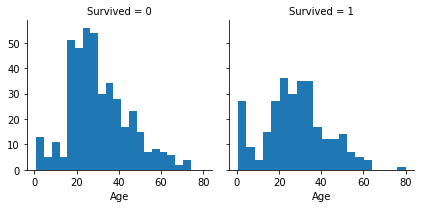

In [122]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Due to the presence of outliers the best way to deal with the missing values is to use median.

In [0]:
#Replace the null values in the Age column with the median

titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

The Embarked column has 2 missing values. It's best to fill them with the most common values in that column to maintain its frequency distribution.

In [0]:
#Replace the null values in the Embarked column with the mode

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

In [125]:
#Check for missing values 

titanic.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [126]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


##Exploratory Data Analysis

**Plot a Correlation Matrix to establish the significance among features.**

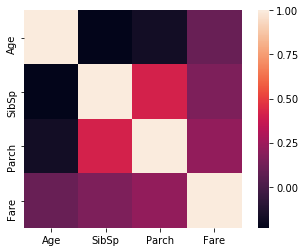

In [143]:
corr = titanic.corr()

ax = sns.heatmap(corr,square=True)

**How many passengers survived and how many died?**

In [135]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**>>> 549 died while 342 survived.**

##Feature Engineering

As was stated earlier women, children and the upper class were given priority to get to safety, we therefore have to establish the title of the passengers, the size of a family or whether the passenger was onboard alone.




It is difficult to establish any information on a passenger based on their names, some are nicknames. So we try establish the title of each passenger.

In [0]:
#Let's establish the title of each passenger

for x in titanic:
    titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [150]:
#What are the titles extracted from the names ?

titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

The titles are many in number and usually we just need to establish if it's a Miss, Mrs, Mr or Master and every other title can be referred to as 'other'.

In [0]:
for x in titanic:
    titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
    titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
    titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [155]:
#What are the titles extracted from the names?

titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

Now we can safely drop the Name column.

In [0]:
column_to_drop = ['Name']

titanic.drop(column_to_drop, axis=1, inplace = True)

In [156]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
0,3,male,22.0,1,0,7.2500,S,0,Mr
1,1,female,38.0,1,0,71.2833,C,1,Mrs
2,3,female,26.0,0,0,7.9250,S,1,Miss
3,1,female,35.0,1,0,53.1000,S,1,Mrs
4,3,male,35.0,0,0,8.0500,S,0,Mr


We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [0]:
for x in titanic:
    titanic['FamSize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [158]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,FamSize
0,3,male,22.0,1,0,7.2500,S,0,Mr,2
1,1,female,38.0,1,0,71.2833,C,1,Mrs,2
2,3,female,26.0,0,0,7.9250,S,1,Miss,1
3,1,female,35.0,1,0,53.1000,S,1,Mrs,2
4,3,male,35.0,0,0,8.0500,S,0,Mr,1


Was the passenger traveling alone or with a family? If the family size is 1 then they are probably alone, if there are more then the passenger is essentially not alone. 

In [0]:
for x in titanic:
    titanic['Alone?'] = 0
    titanic.loc[titanic['FamSize'] == 1, 'Alone?'] = 1

In [160]:
titanic['Alone?'].unique()

array([0, 1])

Essentially if Alone = 0 they are not alone but if Alone = 1 they are alone.

In [161]:
titanic.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,FamSize,Alone?
0,3,male,22.0,1,0,7.2500,S,0,Mr,2,0
1,1,female,38.0,1,0,71.2833,C,1,Mrs,2,0
2,3,female,26.0,0,0,7.9250,S,1,Miss,1,1
3,1,female,35.0,1,0,53.1000,S,1,Mrs,2,0
4,3,male,35.0,0,0,8.0500,S,0,Mr,1,1
5,3,male,28.0,0,0,8.4583,Q,0,Mr,1,1
6,1,male,54.0,0,0,51.8625,S,0,Mr,1,1
7,3,male,2.0,3,1,21.0750,S,0,Master,5,0
8,3,female,27.0,0,2,11.1333,S,1,Mrs,3,0
9,2,female,14.0,1,0,30.0708,C,1,Mrs,2,0


Thereafter we can drop the colums 'SibSp','Parch' and 'FamSize'

In [0]:
titanic = titanic.drop(['Parch', 'SibSp', 'FamSize'], axis=1)

In [163]:
titanic.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Title,Alone?
0,3,male,22.0,7.2500,S,0,Mr,0
1,1,female,38.0,71.2833,C,1,Mrs,0
2,3,female,26.0,7.9250,S,1,Miss,1
3,1,female,35.0,53.1000,S,1,Mrs,0
4,3,male,35.0,8.0500,S,0,Mr,1


In [0]:
categoricals = ['Sex','Embarked','Title']

titanic = pd.get_dummies(titanic, columns=['Sex','Embarked','Title'])

In [165]:
#titanic = titanic[['Pclass','Age','Fare','Alone?','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Other','Survived']]

titanic.head()

,Pclass,Age,Fare,Survived,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,22.0,7.2500,0,0,0,1,0,0,1,0,0,1,0,0
1,1,38.0,71.2833,1,0,1,0,1,0,0,0,0,0,1,0
2,3,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,35.0,53.1000,1,0,1,0,0,0,1,0,0,0,1,0
4,3,35.0,8.0500,0,1,0,1,0,0,1,0,0,1,0,0


We must consider the age column, if a passenger was a child they had a higher chance of survival, therefore we must categorize a passenger as adult(1) or child(0) in a new Adult column.

In [0]:
titanic["Adult"] = 0

titanic["Adult"][titanic["Age"] >= 18] = 1

#Thereafter drop the age column

titanic = titanic.drop(['Age'], axis=1)


In [0]:
titanic = titanic[['Pclass','Adult','Fare','Alone?','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Other','Survived']]


In [168]:
titanic.head()

,Pclass,Adult,Fare,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Survived
0,3,1,7.2500,0,0,1,0,0,1,0,0,1,0,0,0
1,1,1,71.2833,0,1,0,1,0,0,0,0,0,1,0,1
2,3,1,7.9250,1,1,0,0,0,1,0,1,0,0,0,1
3,1,1,53.1000,0,1,0,0,0,1,0,0,0,1,0,1
4,3,1,8.0500,1,0,1,0,0,1,0,0,1,0,0,0


**Split the dataset into train and test sets.**

In [0]:
#Define our X and y

X = titanic.iloc[:, :-1]
y = titanic.iloc[:,-1]

In [170]:
print(X.head())

print(y.head())

  Pclass  Adult     Fare  Alone?  ...  Title_Miss  Title_Mr  Title_Mrs  Title_Other
0      3      1   7.2500       0  ...           0         1          0            0
1      1      1  71.2833       0  ...           0         0          1            0
2      3      1   7.9250       1  ...           1         0          0            0
3      1      1  53.1000       0  ...           0         0          1            0
4      3      1   8.0500       1  ...           0         1          0            0

[5 rows x 14 columns]
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]


In [0]:
#Train and test split

X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state = 42)

In [172]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (712, 14)
Shape of the y_train:  (712,)
Shape of the X_test:  (179, 14)
Shape of the y_test:  (179,)


In [173]:
#Perform the K-Nearest Neighbors Classifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[87 18]
 [20 54]]
The accuracy : 0.7877094972067039


Let us repeat the step using 70% training data and 30% test data.

In [0]:
#Train and test split

X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.3,random_state = 42)

In [175]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (623, 14)
Shape of the y_train:  (623,)
Shape of the X_test:  (268, 14)
Shape of the y_test:  (268,)


In [176]:
#Perform the K-Nearest Neighbors Classifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

[[133  24]
 [ 30  81]]
The accuracy : 0.7985074626865671


Let's use 60% training data and 40% test data.

In [0]:
#Train and test split

X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.4,random_state = 42)

In [178]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (534, 14)
Shape of the y_train:  (534,)
Shape of the X_test:  (357, 14)
Shape of the y_test:  (357,)


In [179]:
#Perform the K-Nearest Neighbors Classifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       216
           1       0.76      0.69      0.72       141

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.79      0.79      0.79       357

[[185  31]
 [ 44  97]]
The accuracy : 0.7899159663865546


##Optimize the K-Nearest Neighbors Classifier

Predict the scores using KNearestNeighbors (KNN) with GridSearchCV

In [180]:
model = KNeighborsClassifier()
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(model, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [181]:
grid.cv_results_

{'mean_fit_time': array([0.00506225, 0.00421576, 0.00424559, 0.00414631, 0.00415702,
        0.00417373, 0.00417075, 0.00392835, 0.0040396 , 0.00396736,
        0.00401428, 0.00401647, 0.00444922, 0.0040308 , 0.00409472,
        0.00413032, 0.00411444, 0.00400405]),
 'mean_score_time': array([0.00649772, 0.00361154, 0.005251  , 0.00370402, 0.00529652,
        0.00364463, 0.00527713, 0.00346966, 0.00520258, 0.00349102,
        0.00505095, 0.0035892 , 0.005656  , 0.00362046, 0.00519054,
        0.00364206, 0.00519726, 0.00367744]),
 'mean_test_score': array([0.65966614, 0.65966614, 0.79278631, 0.72675857, 0.71474621,
        0.7088856 , 0.72745571, 0.71014169, 0.70510635, 0.70727049,
        0.72241287, 0.71698542, 0.66973859, 0.72119494, 0.68750429,
        0.69951041, 0.63371451, 0.67364671]),
 'param_n_neighbors': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    Fal

In [182]:
print ("Best Score: ",str(grid.best_score_))

Best Score:  0.7927863101318157


In [183]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 2, 'weights': 'uniform'}


In [184]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


In [0]:
#Predict scores

y_pred = grid.predict(X_test)

In [186]:
#Calculate Accuracy

print('The accuracy :',accuracy_score(y_pred,y_test))

The accuracy : 0.7535014005602241


In [187]:
# Calculate precision, recall, and fbeta_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       216
           1       0.80      0.50      0.61       141

    accuracy                           0.75       357
   macro avg       0.77      0.71      0.72       357
weighted avg       0.76      0.75      0.74       357



A larger dataset would result in a higher level of accuracy.